7.규제된 선형회귀

Contents
<div id="toc"></div>

# 1. Review

## 1.1. 교차검증

In [2]:
import sklearn.datasets as d
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import pandas as pd
import numpy as np

In [3]:
boston = d.load_boston()

X = boston.data
y = boston.target

lr = lm.LinearRegression()

k = ms.KFold(5, shuffle = True, random_state = 42)
r2_scores= ms.cross_val_score(lr, X, y, cv = k)

print(r2_scores)

[0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]


# 2. 규제 선형 회귀

- **회귀 모형과 회귀 계수**
    - 지금까지의 선형 회귀 모형은 비용 함수 RSS를 최소화 하는 데에 초점을 맞추었다.
    - 이에 따라서 훈련 데이터에는 지나치게 잘 맞고 회귀 계수가 커지게 되어, <br>검증 데이터에서는 올바르게 예측을 하지 못할 수 있다. (과대적합)
    - 따라서 비용 함수는 RSS를 최소화 하면서도 **회귀 계수 값이 너무 커지지 않도록** 균형을 이룰 필요가 있다.
    - 즉, 비용 함수의 목표는 다음과 같이 수정된다.   

      ![image.png](img/ch7_0.png)                          
                      -> RSS : OLS, SGD  
                      -> (1-a) * RSS + a * f(w) (0 < a < 1)  
    (이 때, f(w)는 회귀 계수에 대한 함수, 즉 추가 제약 조건이고,<br>α는 RSS(w)와 f(w)의 비중을 조정하는 매개변수이다.)

- 매개변수 **α의 값에 따라서** 잔차제곱합 RSS와 회귀 계수에 대한 추가 제약 조건 f(w)의 비중이 달라진다.
    ![image.png](img/ch7_0.png)


- <span class="mark">α가 0이라면</span>, 비용 함수는 기존과 동일하게 RSS 값으로 적용된다. 이 때의 목표는 결국 <span class="mark">RSS 값을 최소화</span> 시키는 것이다.
- <span class="mark">α가 매우 큰 값이라면</span>, 상대적으로 RSS 값은 의미가 없고 f(w)의 값이 비용 함수의 대부분을 차지한다. 이 때의 목표는 이 <span class="mark">f(w)의 값을 최소화</span> 시키는 것이다.


## 2.1. 규제 (Regularization)

- 결과적으로, α의 값을 0부터 차츰 증가시키면 회귀 계수 w값의 크기를 감소시킬 수 있다.
- 이렇게 회귀 계수 값의 크기를 감소시켜서 과대적합 문제를 개선하여 학습하는 것을 규제라고 하며, 크게 L1 규제와 L2 규제로 구분한다.
    - L1 규제 : f(w)가 회귀 계수 w들의 절대값들의 합이다.
    - L2 규제 : f(w)가 회귀 계수 w들의 제곱합이다.

## 2.2. 릿지 회귀 (Ridge Regression)

- L2 규제를 적용한 회귀를 릿지 회귀라고 한다.

![image.png](img/ch7_1.png)

- α가 0이라면, 비용 함수는 기존과 동일하게 RSS 값으로 적용된다. 따라서 기본적인 선형 회귀와 같아진다.
- α가 매우 큰 값이라면, 회귀 계수들의 제곱합이 최소화되어야 하므로 회귀 계수들이 거의 0에 근접한다. <br>따라서 회귀 모형은 데이터의 평균을 지나가는 수평선이 된다.

### 2.2.1. 사이킷런으로 릿지 회귀 수행

1. linear_model 모듈에 있는 Ridge를 이용하여 릿지 회귀를 수행한다.
    - 매개변수 alpha는 L2 규제 계수인 α 값이다.
    ```python
    import sklearn.linear_model as lm

    ridge = lm.Ridge(alpha = 0.01)
    reg = ridge.fit(X_train, y_train)
    ```
    
    - alpha를 0으로 지정해서 수행하면, LinearRegression 을 이용한 일반적인 선형 회귀와 동일한 결과가 나오는 것을 확인할 수 있다.
    - alpha를 증가시키면, 회귀 계수의 값들이 점차 작아져서 0에 가까워지는 것을 확인할 수 있다.

2. 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 경우

    ```python
        diab = d.load_diabetes()
        X_train, X_test, y_train, y_test = \
        ms.train_test_split(diab.data, diab.target, \
                            test_size=0.3, random_state=78)
        
        ridge = lm.Ridge(alpha = 0.01)
        reg = ridge.fit(X_train, y_train)

        y_pred = reg.predict(X_test)
    ```

3. 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 결과

![image.png](img/ch7_2.png)

4. 당뇨병 진단 데이터에 대해 여러 alpha 값들로 수행한 결과 (훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)


![image.png](img/ch7_3.png)

In [5]:
import sklearn.datasets as d
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
diab = d.load_diabetes()
X_train, X_test, y_train, y_test = \
ms.train_test_split(diab.data, diab.target, \
                 test_size=0.3, random_state=78)
ridge = lm.Ridge(alpha = 0.01)
reg = ridge.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

In [11]:
n = X_train.shape[0]
k = X_train.shape[1]

adj_r2 = 1 - ((1-r2)*(n-1) / (n-k-1))

In [12]:
print("R2 :",r2)
print("수정R2 :",adj_r2)

R2 : 0.5126648996637303
수정R2 : 0.4963113728068085


In [13]:
coefs = pd.Series(np.round(reg.coef_,3), index = diab.feature_names)
coefs.sort_values(ascending = False)

s5     735.286
bmi    450.733
bp     367.440
s2     239.094
s6      60.548
s4     -23.619
age    -29.339
s3     -95.215
sex   -179.510
s1    -436.699
dtype: float64

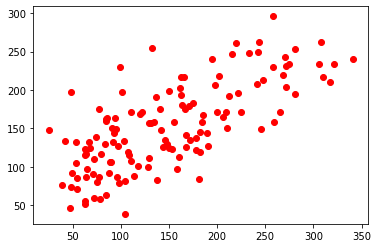

In [16]:
#plt.figure(figsize = (4, 4))
plt.scatter(y_test, y_pred, color = 'red')

In [19]:
# w의 계수가 작아짐으로 분산이 줄어들어 과대적합이 줄어듬
# 회귀계수가 커지는 것은 좋은 것이 아니다.


diab = d.load_diabetes()

X = diab.data
y = diab.target

# 학습준비
# 학습
# 예측
# 평가

alphas = [0, 0.01, 1, 10, 100]
df = pd.DataFrame()

# for a in alphas:
#     rg = lm.Ridge(alpha = a).fit(X, y)
#     c = pd.Series(np.round(rg.coef_, 3), index = [col.upper() for col in diab.feature_names])
#     cname = "alpha = " + str(a)
#     df[cname] = c

# intercept 추가
for a in alphas:
    rg = lm.Ridge(alpha = a).fit(X, y)
    c = pd.Series(np.hstack((np.round(rg.coef_, 3),np.round(rg.intercept_,3))), \
                  index = [col.upper() for col in diab.feature_names] + ["INTERCEPT"])
    cname = "alpha = " + str(a)
    df[cname] = c
    
df

,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012,-7.199,29.466,19.813,2.897
SEX,-239.819,-234.553,-83.155,-0.918,0.585
BMI,519.840,520.583,306.352,75.416,9.241
BP,324.390,320.523,201.629,55.025,6.931
S1,-792.184,-380.607,5.909,19.925,3.231
S2,476.746,150.484,-29.516,13.949,2.617
S3,101.045,-78.591,-152.040,-47.554,-6.175
S4,177.064,130.313,117.312,48.259,6.678
S5,751.279,592.350,262.945,70.144,8.877
S6,67.625,71.134,111.879,44.214,5.956


## 2.3. 라쏘 회귀 (Lasso Regression)

- L1 규제를 적용한 회귀를 라쏘 회귀라고 한다.
![image.png](img/ch7_4.png)

- L1 규제는 불필요한 회귀 계수를 가급적 0으로 만들어 제거하려는 특징이 있다. 따라서 결과적으로는 적절한 특성들만 회귀 모형에 포함시키게 된다.

### 2.3.1. 사이킷런으로 라쏘 회귀 수행

1. linear_model 모듈에 있는 Lasso를 이용하여 라쏘 회귀를 수행한다.
    - 매개변수 alpha는 L1 규제 계수인 α 값이다
    
    ```python
    import sklearn.linear_model as lm
    
    lasso = lm.Lasso(alpha = 0.01)
    reg = lasso.fit(X_train, y_train)
    ```
    
    - alpha를 0으로 지정해서 수행하면, LinearRegression 을 이용한 일반적인 선형 회귀와 동일한 결과가 나오는 것을 확인할 수 있다.
    - alpha를 증가시키면, 회귀 계수의 값들이 급격하게 0에 수렴하는 것을 확인할 수 있다

2. 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 경우

```python
    diab = d.load_diabetes()
    X_train, X_test, y_train, y_test = \
    ms.train_test_split(diab.data, diab.target, \
                     test_size=0.3, random_state=78)

    lasso = lm.Lasso(alpha = 0.01)
    reg = lasso.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
```

3. 당뇨병 진단 데이터에 대해 alpha를 0.01로 설정한 결과

![image.png](img/ch7_5.png)

4. 당뇨병 진단 데이터에 대해 여러 alpha 값들로 수행한 결과 (훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)

![image.png](img/ch7_6.png)

R2 : 0.5088520367941951
수정R2 : 0.4923705615188325


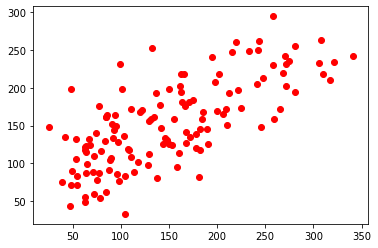

In [20]:
diab = d.load_diabetes()
X_train, X_test, y_train, y_test = \
ms.train_test_split(diab.data, diab.target, \
                 test_size=0.3, random_state=78)
lasso = lm.Lasso(alpha = 0.01)
reg = lasso.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

n = X_train.shape[0]
k = X_train.shape[1]

adj_r2 = 1 - ((1-r2)*(n-1) / (n-k-1))

print("R2 :",r2)
print("수정R2 :",adj_r2)

coefs = pd.Series(np.round(reg.coef_,3), index = diab.feature_names)
coefs.sort_values(ascending = False)

#plt.figure(figsize = (4, 4))
plt.scatter(y_test, y_pred, color = 'red')

In [22]:
diab = d.load_diabetes()

X = diab.data
y = diab.target

alphas = [0, 0.01, 1, 10, 100]
df = pd.DataFrame()

for a in alphas:
    ls = lm.Lasso(alpha = a).fit(X, y)
    c = pd.Series(np.hstack((np.round(ls.coef_, 3),np.round(ls.intercept_,3))), \
                  index = [col.upper() for col in diab.feature_names] + ["INTERCEPT"])
    cname = "alpha = " + str(a)
    df[cname] = c
    
df

# alpha가 0인 경우 Warning 뜸
# 극단적으로 값을 올리면 죽어버림

<ipython-input-22-d620f14aff35>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls = lm.Lasso(alpha = a).fit(X, y)
C:\Users\ryzen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ryzen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631991.5781277422, tolerance: 262.1009124434389
  model = cd_fast.enet_coordinate_descent(


,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012,-1.307,0.000,0.000,0.000
SEX,-239.819,-228.822,-0.000,0.000,0.000
BMI,519.840,525.561,367.702,0.000,0.000
BP,324.390,316.175,6.302,0.000,0.000
S1,-792.184,-307.014,0.000,0.000,0.000
S2,476.746,89.322,0.000,0.000,0.000
S3,101.045,-105.081,-0.000,-0.000,-0.000
S4,177.064,119.598,0.000,0.000,0.000
S5,751.279,571.331,307.606,0.000,0.000
S6,67.625,65.007,0.000,0.000,0.000


## 2.4. 엘라스틱넷 회귀 (Elastic Net Regression)

- L1 규제와 L2 규제를 혼합한 회귀를 엘라스틱넷 회귀라고 한다.
![image.png](img/ch7_7.png)

- α는규제 매개변수이고 r 은 혼합 비율이다.
- 두 종류의 규제를 혼합하여 릿지 회귀와 라쏘 회귀의 절충형태를 학습 모형으로 도출할 수 있다.
- r이 0이라면 L2 규제와 동일하므로 릿지 회귀가 된다.
- r이 1이라면 L1 규제와 동일하므로 라쏘 회귀가 된다.

### 2.4.1. 사이킷런으로 엘라스틱넷 회귀 수행

1. **linear_model** 모듈에 있는 **ElasticNet**을 이용하여 엘라스틱넷 회귀를 수행한다.
    - 매개변수 alpha는 규제 계수인 α 값이다.
    - 매개변수 l1_ratio는 혼합 비율 r이다.

```python
import sklearn.linear_model as lm

elastic = lm.ElasticNet(alpha = 0.01, l1_ratio = 0.5)
reg = elastic.fit(X_train, y_train)
```

2. 당뇨병 진단 데이터에 대해 alpha를 0.01로, l1_ratio를 0.5로 설정한 경우

```python
diab = d.load_diabetes()
X_train, X_test, y_train, y_test = \
ms.train_test_split(diab.data, diab.target, \
                 test_size=0.3, random_state=78)

elastic = lm.ElasticNet(alpha = 0.01, l1_ratio = 0.5)
reg = elastic.fit(X_train, y_train)

y_pred = reg.predict(X_test)
```

3. 당뇨병 진단 데이터에 대해 alpha를 0.01로, l1_ratio를 0.5로 설정한 결과
![image.png](img/ch7_8.png)

4. 당뇨병 진단 데이터에 대해 l1_ratio 값은 0.5로 고정하고 alpha를 변경하면서 수행한 결과 (훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)
![image.png](img/ch7_9.png)

5. 당뇨병 진단 데이터에 대해 alpha 값은 0.01로 고정하고 l1_ratio를 변경하면서 수행한 결과 (훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용하였다.)
![image.png](img/ch7_10.png)

In [25]:
diab = d.load_diabetes()

X = diab.data
y = diab.target

ratios = [0.01, 0.1, 0.5, 0.75, 1]
df = pd.DataFrame()


# l1_latio를 1로 두면 Lasso와 같은 결과가 나옴(Lasso 자체를 호출)
# 0으로 두면 Ridge와 같은 결과가 나오지 않음 
# -> Ridge 자체를 호출하지 않음. 데이터 사이즈가 매우크면 값이 같을 수 있음.
for r in ratios:
    en = lm.ElasticNet(alpha = 0.01, l1_ratio = r).fit(X, y)
    c = pd.Series(np.hstack((np.round(en.coef_, 3),np.round(en.intercept_,3))), \
                  index = [col.upper() for col in diab.feature_names] + ["INTERCEPT"])
    cname = "alpha = " + str(r)
    df[cname] = c
    
df

,alpha = 0.01,alpha = 0.1,alpha = 0.5,alpha = 0.75,alpha = 1
AGE,29.664,30.503,33.147,29.229,-1.307
SEX,-12.202,-14.496,-35.246,-74.199,-228.822
BMI,139.302,148.365,211.024,293.577,525.561
BP,98.763,104.729,144.560,193.700,316.175
S1,25.796,25.844,21.932,6.387,-307.014
S2,13.027,11.984,0.000,-21.861,89.322
S3,-82.522,-87.044,-115.620,-146.542,-105.081
S4,78.112,81.553,100.659,114.735,119.598
S5,125.787,133.448,185.326,252.765,571.331
S6,73.338,76.794,96.257,110.043,65.007


# 3. 회귀 모형의 선택

- 기본적인 선형 회귀, 릿지, 라쏘, 엘라스틱넷 중 어떤 것이 가장 좋은 모형을 도출하는지는 상황에 따라 달라진다.
- 각 기법 별로 매개변수들을 변경해 가면서 학습하여 최적의 성능 지표를 나타내는 모형을 선택해야 한다.
- 다만, 다음과 같은 가이드를 참고하면 도움이 될 수 있다.
    - <span class="mark">규제가 없는 기본 선형 회귀를 수행하면서 과대적합이 확실시 되면 릿지 회귀로 전환한다.
    - <span class="mark">전체 특성들 중 일부만 의미가 있다고 유추할 수 있거나 관찰되었다면 라쏘 또는 엘라스틱넷 회귀를 시도한다.</span>
    - <span class="mark">특성들 간의 관련성이 높으면 (즉, 상관 계수가 높으면) 엘라스틱넷 회귀를 적용하는 것이 바람직하다.</span></span>
    
 
 - ratio를 0에서 1까지 일정간격으로 엘라스틱넷 회귀를 하여 가장 설명력이 높은 모델 선택?
 - alpha가 달라진다면? -> 해당 ratio가 가장 좋다는 보장이 없음

In [26]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>